**Exercise:**
In this lab, you will select a dataset for multiple classification and apply all the details of this notebook.

I use the "Iris" dataset. This is a popular dataset in machine learning and consists of measurements of the sepal length, sepal width, petal length, and petal width for 150 iris flowers, with 50 flowers from each of three different species: Iris setosa, Iris versicolor, and Iris virginica.

# Loading and Plotting Data

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
iris = load_iris()

# Create a pandas dataframe with the data and feature names
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])
df = df[['sepal length (cm)', 'petal width (cm)', 'target']]
X = df[['sepal length (cm)', 'petal width (cm)']].values
y = df['target'].values
y = label_binarize(y, classes=[0, 1])[:, 0]

# Print the first few rows of the dataframe
print(df.head())


   sepal length (cm)  petal width (cm)  target
0                5.1               0.2     0.0
1                4.9               0.2     0.0
2                4.7               0.2     0.0
3                4.6               0.2     0.0
4                5.0               0.2     0.0


In [3]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

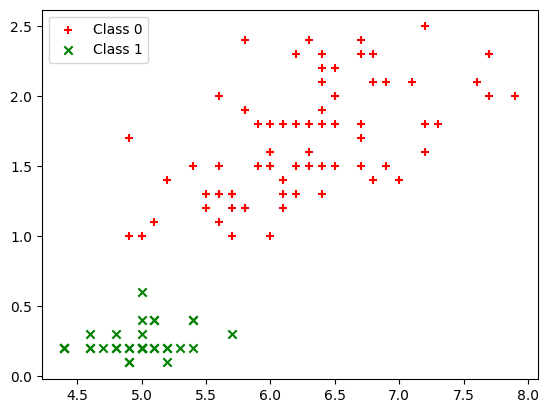

In [4]:
# Plot the training data
MARKERS = ['+', 'x', '.']
COLORS = ['red', 'green', 'blue']

def plot_points(xy, labels):
    for i, label in enumerate(set(labels)):
        points = xy[labels == label]
        marker = MARKERS[i % len(MARKERS)]
        color = COLORS[i % len(COLORS)]
        plt.scatter(points[:,0], points[:,1], marker=marker, color=color, label=f'Class {label}')
    plt.legend()

plot_points(X_train, y_train)

# Simple Logistic Regression

In [5]:
def sigmoid(X):
    return 1 / (1 + np.exp(-X))

def cost(theta, X, y):
    theta = theta[:,None]
    y = y[:,None]
    
    hyp = sigmoid(X.dot(theta))
    pos = np.multiply(-y, np.log(hyp))
    neg = np.multiply((1 - y), np.log(1 - hyp))
    
    return np.sum(pos - neg) / (len(X))

def gradient(theta, X, y):
    theta = theta[:,None]
    y = y[:,None]
    
    error = sigmoid(X.dot(theta)) - y
    return X.T.dot(error) / len(X)

In [6]:
# Train the model 
from scipy.optimize import fmin_tnc  

def train(X, y):
    X = np.insert(X, 0, np.ones(len(X)), axis=1)
    theta = np.zeros(X.shape[1])
    result = fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))
    
    return result[0]

theta = train(X_train, y_train)
print('theta: ', theta)

theta:  [ 10.74686215   6.06006247 -55.22386456]


<ipython-input-5-66ac244f4d75>:10: RuntimeWarning: divide by zero encountered in log
  neg = np.multiply((1 - y), np.log(1 - hyp))
<ipython-input-5-66ac244f4d75>:10: RuntimeWarning: invalid value encountered in multiply
  neg = np.multiply((1 - y), np.log(1 - hyp))


# Decision Boundaries and Evaluation

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
def predict(X, theta):
    X = np.insert(X, 0, np.ones(len(X)), axis=1)
    return (sigmoid(X * np.matrix(theta).T) >= 0.5).astype(int)

predictions = predict(X_test, theta)
predictions = np.asarray(predictions).ravel()
print(confusion_matrix(y_test, predictions))

print('accuracy:', accuracy_score(y_test, predictions))
print('precision:', precision_score(y_test, predictions, average='macro'))
print('recall:', recall_score(y_test, predictions, average='macro'))

[[22  0]
 [ 0 16]]
accuracy: 1.0
precision: 1.0
recall: 1.0


In [11]:
# The score method returns the accuracy of the model
from sklearn.metrics import f1_score
print(f1_score(y_test, predictions, average='macro'))
print(f1_score(y_test, predictions, average='micro'))
print(f1_score(y_test, predictions, average=None))

1.0
1.0
[1. 1.]


In [12]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Use the fitted pipeline to make predictions on the validation dataset

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print("Accuracy (validation):", accuracy_score(y_test, predictions))

[[22  0]
 [ 0 16]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        16

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

Accuracy (validation): 1.0


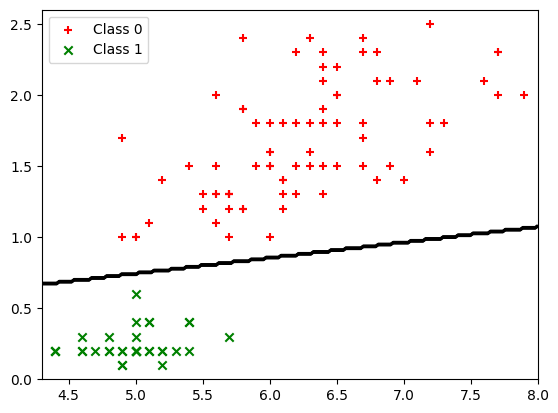

In [13]:
from matplotlib import cm
import numpy as np

def plot_boundary(X, pred):
    
    x_min, x_max = X[:,0].min() - .1, X[:,0].max() + .1
    y_min, y_max = X[:,1].min() - .1, X[:,1].max() + .1
    
    xs, ys = np.meshgrid(
        np.linspace(x_min, x_max, 200),
        np.linspace(y_min, y_max, 200)
    )

    xys = np.column_stack([xs.ravel(), ys.ravel()])
    zs = pred(xys).reshape(xs.shape)

    plt.contour(xs, ys, zs, colors='black')
        
plot_points(X_train, y_train)
plot_boundary(X_train, lambda x: predict(x, theta))

# Multinomaila Logistic Regression

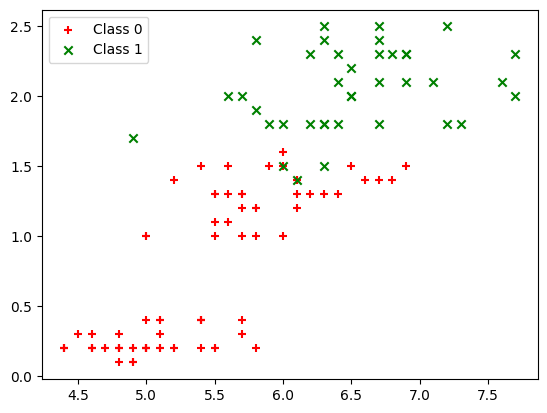

In [14]:
X = df[['sepal length (cm)', 'petal width (cm)']].values
y = df[['target']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
y_train = label_binarize(y_train, classes=[1, 2, 3])

plot_points(X_train, y_train.argmax(axis=1))

accuracy: 0.631578947368421
precision: 0.4318181818181818
recall: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


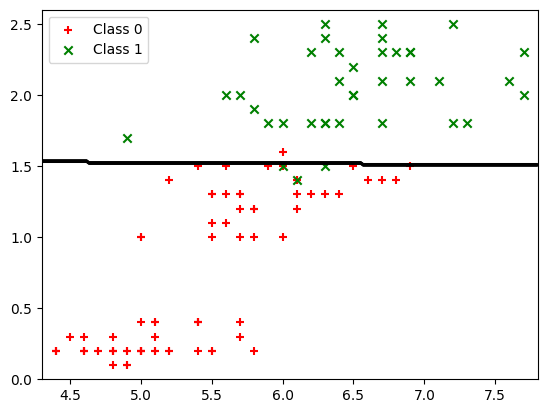

In [16]:
# Define a function to predict multiple classes using logistic regression
def predict_multi(X, thetas):
    X = np.insert(X, 0, np.ones(len(X)), axis=1)
    preds = [sigmoid(X * np.asmatrix(t).T) for t in thetas]
    return np.column_stack(preds).argmax(axis=1)

# Train the model
thetas = [train(X_train, y_train[:,i]) for i in range(0,3)]

# Make predictions on the test set
predictions = predict_multi(X_test, thetas) + 1
predictions = np.asarray(predictions).ravel()
print('accuracy:', accuracy_score(y_test, predictions))
print('precision:', precision_score(y_test, predictions, average='macro'))
print('recall:', recall_score(y_test, predictions, average='macro'))

# Plot the decision boundaries
plot_points(X_train, y_train.argmax(axis=1))
plot_boundary(X_train, lambda x: predict_multi(x, thetas))

accuracy: 0.6052631578947368
precision: 0.42608695652173917
recall: 0.5555555555555555


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


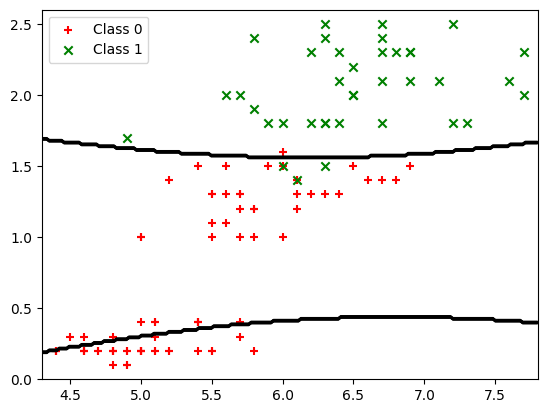

In [18]:
# Set the random seed for reproducibility
def transform_x(x):
    return [x[0], x[1], x[0] ** 2, x[1] ** 2, x[0] * x[1]]

def transform(X):
    return np.apply_along_axis(transform_x, 1, X)

# Train the model
X_train = transform(X_train)
X_test = transform(X_test)
thetas = [train(X_train, y_train[:,i]) for i in range(0,3)]

# Make predictions on the test set
predictions = predict_multi(X_test, thetas) + 1
predictions = np.asarray(predictions).ravel()

# Plot the decision boundaries and the data points
print('accuracy:', accuracy_score(y_test, predictions))
print('precision:', precision_score(y_test, predictions, average='macro'))
print('recall:', recall_score(y_test, predictions, average='macro'))
plot_points(X_train, y_train.argmax(axis=1))
plot_boundary(X_train, lambda x: predict_multi(transform(x), thetas))

# Regularization

In [20]:
# Set the value 
X = df.drop('target', 1).values
y = df[['target']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
y_train = label_binarize(y_train, classes = [1, 2, 3])

def cost_reg(theta, X, y, lambda_):
    theta_reg = np.array((0, *theta[1:]))[:,None]
    reg = lambda_ * np.square(theta_reg).sum() / (2 * len(X))
    
    return cost(theta, X, y) + reg

def gradient_reg(theta, X, y, lambda_):
    theta_reg = np.array((0, *theta[1:]))[:,None]
    reg = lambda_ * theta_reg / len(X)
    
    return gradient(theta, X, y) + reg

def train_reg(X, y, lambda_):
    X = np.insert(X, 0, np.ones(len(X)), axis=1)
    theta = np.zeros(X.shape[1])
    result = fmin_tnc(func=cost_reg, x0=theta, fprime=gradient_reg, args=(X, y, lambda_))
    
    return result[0]

# Train the model
thetas = [train_reg(X_train, y_train[:,i], 1.0) for i in range(0,3)]
predictions = predict_multi(X_test, thetas) + 1
predictions = np.asarray(predictions).ravel()

# Print the accuracy, precision, and recall
print('accuracy:', accuracy_score(y_test, predictions))
print('precision:', precision_score(y_test, predictions, average='macro'))
print('recall:', recall_score(y_test, predictions, average='macro'))

accuracy: 0.6052631578947368
precision: 0.4211017740429505
recall: 0.6


<ipython-input-20-d2ce9cdbb097>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop('target', 1).values
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Logistic Regression with TensorFlow

In [21]:
import tensorflow as tf
import tensorflow.compat.v1 as v1
tf.compat.v1.disable_eager_execution()

def tf_create(n_features, n_labels, lambda_):
    
    examples = v1.placeholder(v1.float64, [None, n_features])
    labels = v1.placeholder(v1.float64, [None, n_labels])
    weights = v1.Variable(v1.zeros([n_features, n_labels], dtype=v1.float64))
    bias = v1.Variable(v1.zeros([n_labels], dtype=tf.float64))
    
    hyp = v1.sigmoid(v1.matmul(examples, weights) + bias)
    loss = v1.reduce_mean(-labels * v1.log(hyp) - (1 - labels) * v1.log(1 - hyp))
    reg = lambda_ * v1.nn.l2_loss(weights)
    cost = loss + reg
    
    train = v1.train.AdamOptimizer().minimize(cost)
    predict = v1.argmax(hyp, axis=1)
    
    def train_(sess, X, y, iterations):
        for i in range(iterations):
            sess.run(train, feed_dict={examples: X, labels: y})
            
    def predict_(sess, X):
        return sess.run(predict, feed_dict={examples: X})
    
    return train_, predict_

accuracy: 1.0
precision: 1.0
recall: 1.0


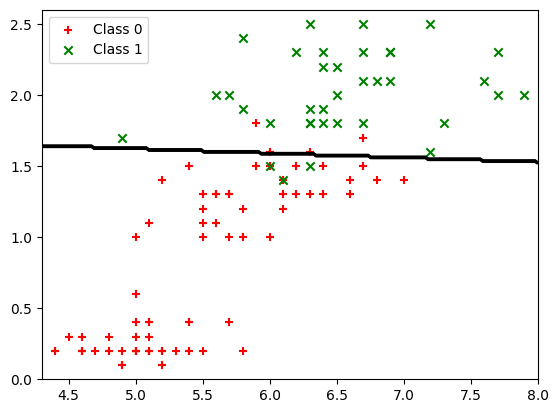

In [22]:
X = df[['sepal length (cm)', 'petal width (cm)']].values
y = label_binarize(df[['target']], classes = [1, 2, 3])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


with v1.Session() as sess:
    
    train, predict = tf_create(X.shape[1], y.shape[1], 0.0)
    sess.run(v1.global_variables_initializer())
    train(sess, X_train, y_train, 30000)

    predictions = predict(sess, X_test)
    y_test = y_test.argmax(axis=1)

    print('accuracy:', accuracy_score(y_test, predictions))
    print('precision:', precision_score(y_test, predictions, average='macro'))
    print('recall:', recall_score(y_test, predictions, average='macro'))

    plot_boundary(X_train, lambda x: predict(sess, x))
    plot_points(X_train, y_train.argmax(axis=1))

accuracy: 0.9473684210526315
precision: 0.9391025641025641
recall: 0.9391025641025641


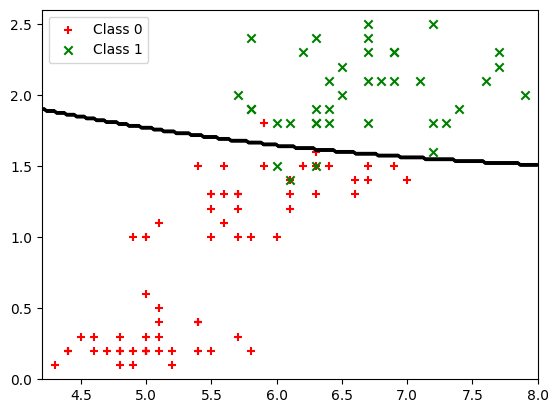

In [23]:
X = df[['sepal length (cm)', 'petal width (cm)']].values
X = transform(X)
y = label_binarize(df[['target']], classes=[1, 2, 3])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

with v1.Session() as sess:
    
    train, predict = tf_create(X.shape[1], y.shape[1], 0.0)
    sess.run(v1.global_variables_initializer())
    train(sess, X_train, y_train, 30000)

    predictions = predict(sess, X_test)
    y_test = y_test.argmax(axis=1)

    print('accuracy:', accuracy_score(y_test, predictions))
    print('precision:', precision_score(y_test, predictions, average='macro'))
    print('recall:', recall_score(y_test, predictions, average='macro'))

    plot_boundary(X_train, lambda x: predict(sess, transform(x)))
    plot_points(X_train, y_train.argmax(axis=1))

In [24]:
X = df.drop('target', 1).values
y = label_binarize(df[['target']], classes=[1, 2, 3])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

with v1.Session() as sess:
    
    train, predict = tf_create(X.shape[1], y.shape[1], 0.1)
    sess.run(v1.global_variables_initializer())
    train(sess, X_train, y_train, 30000)

    predictions = predict(sess, X_test)
    y_test = y_test.argmax(axis=1)

    print('accuracy:', accuracy_score(y_test, predictions))
    print('precision:', precision_score(y_test, predictions, average='macro'))
    print('recall:', recall_score(y_test, predictions, average='macro'))

<ipython-input-24-7aa82a63796f>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop('target', 1).values


accuracy: 0.8947368421052632
precision: 0.8823529411764706
recall: 0.9199999999999999
